<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW4/problem2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
library(readr)

#reading in data
nutrition_subset <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

Rows: 961 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): food item
dbl (3): weight_in_grams, saturated_fat, cholesterol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


***High Saturated Fats:***
My first task in this problem was to make a data set with the top five highest foods in saturated fats. I did this by first making a new dataframe with saturated fats in desending order, then displayed the data. This data showed me that there are some inconsistancys in aranging the data like this. For example Lard 1 cup is weighs a lot less then 1 cheesecake, yet they have very close saturated fat.

In [58]:
#ordering data set by saturated fats in desending order 
nutrition_subset2 <- nutrition_subset[with(nutrition_subset,order(-nutrition_subset$saturated_fat)),]

#making it display the top 5 highest foods in saturated fat
nutrition_subset2 <- nutrition_subset2[1:5,]
nutrition_subset2

food item,weight_in_grams,saturated_fat,cholesterol
<chr>,<dbl>,<dbl>,<dbl>
CHEESECAKE 1 CAKE,1110,119.9,2053
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188,118.3,703
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108,92.0,609
CREME PIE 1 PIE,910,90.1,46
LARD 1 CUP,205,80.4,195


***Saturated Fat per Gram:***
To get a more accurate mesurement I created a new coloum called saturated_fat_per_gram. I computed this by dividing saturated_fat by weight_in_grams. By doing this I got a much more accurate results. The top result in this feild was BUTTER; SALTED 1TBSP at 0.507143 saturated_fat_per_gram 

In [59]:
#adding new coloum to the end of the data set (saturated_fat_per_gram)(saturated fats/ weight in grams)
nutrition_subset$saturated_fat_per_gram = c(nutrition_subset$saturated_fat/nutrition_subset$weight_in_grams)

#ordering data set by saturated_fat_per_gram in desending order 
nutrition_subset3 <- nutrition_subset[with(nutrition_subset,order(-nutrition_subset$saturated_fat_per_gram)),]

#making it display the top 5 highest foods in saturated_fat_per_gram
nutrition_subset3 <- nutrition_subset3[1:5,]
nutrition_subset3


food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; SALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; UNSALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000


***Standardize (zero mean) the field saturated_ fat_ per_gram:***
I then moved on to standardizing and finding any outliers this data set has to offer. I fist made a scaled_saturated_fat_per_gram and displayed a summary of its data. i then applyed the three sigma rule to the scaled data. It showed me that there are 758 outliers in this data field. I then put the data into a density plot. 

In [60]:
#standardizing saturated_fat_per_gram

#making scaled saturated_fat_per_gram
nutrition_subset$scaled_saturated_fat_per_gram <- scale(x = nutrition_subset$saturated_fat_per_gram)
summary(nutrition_subset$scaled_saturated_fat_per_gram)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  

In [61]:
#three sigma rule 
three_sigma_rule <- (nutrition_subset$scaled_saturated_fat_per_gram < -.3 | nutrition_subset$scaled_saturated_fat_per_gram > .3)

#number of outliers
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

There are 758 outliers 



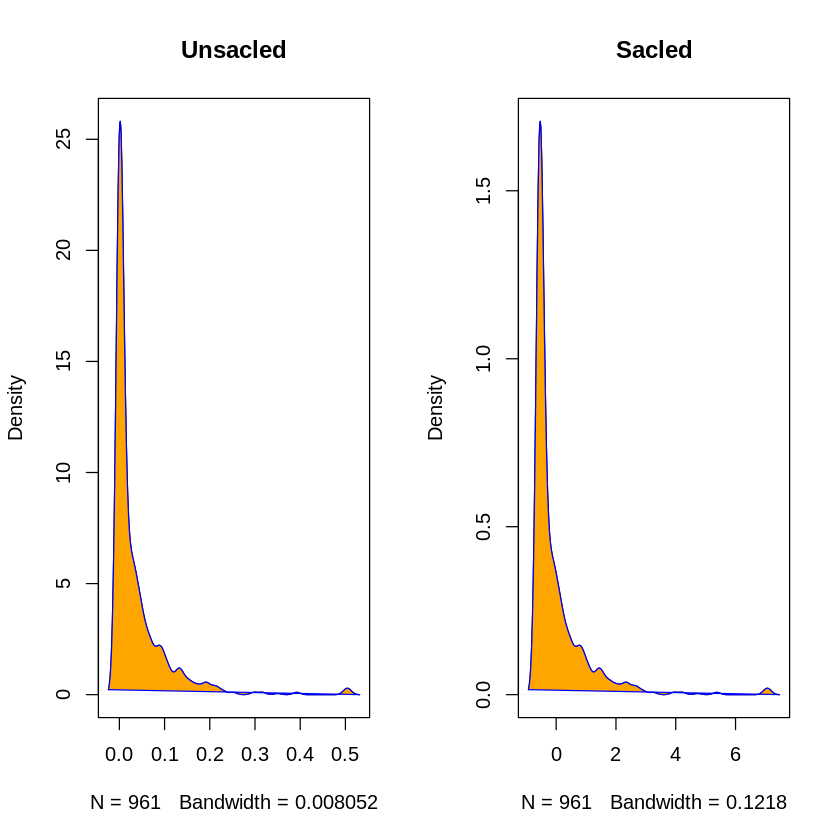

In [62]:
#density plots 
par(mfrow = c(1,2))

#unsacled plot 
d1 <- density(nutrition_subset$saturated_fat_per_gram)
plot(d1, main = "Unsacled")
polygon(d1, col = "orange", border = "blue")

# plot
d2 <- density(nutrition_subset$scaled_saturated_fat_per_gram)
plot(d2, main = "Sacled")
polygon(d2, col = "orange", border = "blue")

***Missing Values:***
Next I used is.na to see if there were any missing values in the data set. There were none, but if there were i would have used the median on the column to replace the missing values 

In [63]:
#finds if there are any missing values 
cat("Missing values: \nsaturated_fat- ", sum(is.na(nutrition_subset$saturated_fat)),
"\ncholesterol- ", sum (is.na(nutrition_subset$cholesterol)),
"\nweight_in_grams- ", sum (is.na(nutrition_subset$weight_in_grams)))
#no missing values 

Missing values: 
saturated_fat-  0 
cholesterol-  0 
weight_in_grams-  0

***Standardizing:***
I then moved on to finding the outliers of all the numerical values in the data set. i scaled saturated fats, cholesterol, and weight in grams. After this i applied the three sigma rule and found that there were 20 outliers in saturated fats, 17 in cholesterol, and 22 in weight in grams. 

In [64]:
#standardizing 
nutrition_subset$scaled_sf <- scale(x = nutrition_subset$saturated_fat)
nutrition_subset$scaled_c <- scale(x = nutrition_subset$cholesterol)
nutrition_subset$scaled_wig <- scale(x = nutrition_subset$weight_in_grams)

#three sigma rule
tsr_sf <- (nutrition_subset$scaled_sf < -3 | nutrition_subset$scaled_sf >3)
tsr_c <- (nutrition_subset$scaled_c < -3 | nutrition_subset$scaled_c >3)
tsr_wig <- (nutrition_subset$scaled_wig < -3 | nutrition_subset$scaled_wig >3)

#determining number of outliers
cat("outliers:\nsaturated_fat- ", sum(tsr_sf),
"\ncholesterol- ", sum(tsr_c),
"\nweight_in_grams- ", sum(tsr_wig))


outliers:
saturated_fat-  20 
cholesterol-  17 
weight_in_grams-  22